# THE VALUE FRAUD

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
path=r"dum_cmx_affaire_prl.csv"

In [26]:
df=pd.read_csv(path,sep=';',low_memory=False)

In [27]:
df.head()

,ID_DUM,NUM_DUM,ID_OP_TRANSITAIRE,DAT_ENREGISTREMENT_DUM,ID_OP_SOUMISSIONNAIRE,ID_OP_DECLARANT,ID_OP_DEST_EXP,NOMBRE_ARTICLES,VALEUR_DUM_DECLAREE,POIDS_NET,...,COD_BD,COD_RD,COD_ACCORD,COD_FRANCHISE,STATUT_COMBINEE,COD_RESULTAT_CNTRL,RESULTAT_SELECTIVITE,COD_MOTIF_RESELECTION,DECISION_AC_VP,FRAUD
0,14797661,10000220140000004,1005.0,2014-02-10 11:50:15.027000000,245324.0,1005,NaN,1,"21946,000","2095,000",...,100,2,NaN,NaN,N,NaN,VP,NaN,NaN,0
1,15289810,10000220140000017,2001.0,2014-08-01 15:11:52.150000000,249725.0,2001,NaN,1,"125586,000","1700,000",...,100,2,NaN,NaN,N,NaN,VP,20.0,NaN,0
2,15345977,10000220140000018,1005.0,2014-09-04 10:46:55.800000000,247286.0,1005,NaN,1,"786673,000","4682,940",...,100,2,NaN,NaN,N,NaN,AC,NaN,NaN,0
3,15477796,10000220140000023,1075.0,2014-10-21 09:04:38.323000000,1109.0,1075,NaN,4,"2731389,000","123394,000",...,100,2,NaN,NaN,N,NaN,AC,NaN,NaN,0
4,17150681,10000220160000001,11587.0,2016-01-15 12:35:22.837000000,258062.0,11587,NaN,3,"1696083,000","131467,000",...,100,2,NaN,NaN,N,NaN,VP,NaN,NaN,0


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10025879 entries, 0 to 10025878
Data columns (total 21 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   ID_DUM                  int64  
 1   NUM_DUM                 int64  
 2   ID_OP_TRANSITAIRE       float64
 3   DAT_ENREGISTREMENT_DUM  object 
 4   ID_OP_SOUMISSIONNAIRE   float64
 5   ID_OP_DECLARANT         int64  
 6   ID_OP_DEST_EXP          float64
 7   NOMBRE_ARTICLES         int64  
 8   VALEUR_DUM_DECLAREE     object 
 9   POIDS_NET               object 
 10  POIDS_BRUT              object 
 11  COD_BD                  int64  
 12  COD_RD                  int64  
 13  COD_ACCORD              object 
 14  COD_FRANCHISE           float64
 15  STATUT_COMBINEE         object 
 16  COD_RESULTAT_CNTRL      float64
 17  RESULTAT_SELECTIVITE    object 
 18  COD_MOTIF_RESELECTION   float64
 19  DECISION_AC_VP          object 
 20  FRAUD                   int64  
dtypes: float64(6), int64(7), obje

In [29]:
df['COD_BD'].value_counts()

COD_BD
411    2568849
309    1757547
301    1673055
300    1626773
401    1140565
100     261889
104     201321
403     189790
201     132342
607     102811
302      91774
404      51142
412      38494
101      32613
602      31527
500      29169
200      29165
306      23758
305      11970
310      10842
600       6371
700       3345
105       2934
304       1331
202       1259
407       1203
405       1125
501       1001
406        884
203        424
603        210
400        193
408         97
504         87
503         19
Name: count, dtype: int64

In [30]:
cols=['ID_DUM','ID_OP_TRANSITAIRE','DAT_ENREGISTREMENT_DUM','ID_OP_SOUMISSIONNAIRE','ID_OP_DECLARANT','NOMBRE_ARTICLES','VALEUR_DUM_DECLAREE','POIDS_NET','POIDS_BRUT','COD_BD','COD_RD','COD_ACCORD','COD_FRANCHISE','FRAUD']


In [31]:
df=pd.DataFrame(df,columns=cols)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10025879 entries, 0 to 10025878
Data columns (total 14 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   ID_DUM                  int64  
 1   ID_OP_TRANSITAIRE       float64
 2   DAT_ENREGISTREMENT_DUM  object 
 3   ID_OP_SOUMISSIONNAIRE   float64
 4   ID_OP_DECLARANT         int64  
 5   NOMBRE_ARTICLES         int64  
 6   VALEUR_DUM_DECLAREE     object 
 7   POIDS_NET               object 
 8   POIDS_BRUT              object 
 9   COD_BD                  int64  
 10  COD_RD                  int64  
 11  COD_ACCORD              object 
 12  COD_FRANCHISE           float64
 13  FRAUD                   int64  
dtypes: float64(3), int64(6), object(5)
memory usage: 1.0+ GB


In [33]:
df1=pd.read_csv(r"C:\Users\Storbiiic\Downloads\df_dum_affaire_not_in_affaire.csv", sep=',')

In [34]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              120 non-null    int64  
 1   ID_DUM                  120 non-null    int64  
 2   NUM_DUM                 120 non-null    int64  
 3   ID_OP_TRANSITAIRE       102 non-null    float64
 4   DAT_ENREGISTREMENT_DUM  120 non-null    object 
 5   ID_OP_SOUMISSIONNAIRE   120 non-null    float64
 6   ID_OP_DECLARANT         120 non-null    int64  
 7   ID_OP_DEST_EXP          14 non-null     float64
 8   NOMBRE_ARTICLES         120 non-null    int64  
 9   VALEUR_DUM_DECLAREE     120 non-null    object 
 10  POIDS_NET               120 non-null    object 
 11  POIDS_BRUT              120 non-null    object 
 12  COD_BD                  120 non-null    int64  
 13  COD_RD                  120 non-null    int64  
 14  COD_ACCORD              24 non-null     ob

In [35]:
df1.head()

,Unnamed: 0,ID_DUM,NUM_DUM,ID_OP_TRANSITAIRE,DAT_ENREGISTREMENT_DUM,ID_OP_SOUMISSIONNAIRE,ID_OP_DECLARANT,ID_OP_DEST_EXP,NOMBRE_ARTICLES,VALEUR_DUM_DECLAREE,...,COD_BD,COD_RD,COD_ACCORD,COD_FRANCHISE,STATUT_COMBINEE,COD_RESULTAT_CNTRL,RESULTAT_SELECTIVITE,COD_MOTIF_RESELECTION,DECISION_AC_VP,FRAUD
0,63114,22532924,10002220180000637,111993.0,2018-09-26 12:46:31.497,4106.0,111993,NaN,1,"3320076,000",...,100,22,NaN,NaN,N,NaN,AC,NaN,AC,1
1,64673,23110401,10002220180000896,1007.0,2018-12-17 12:49:27.530,4106.0,1007,NaN,1,"1195488,000",...,100,22,NaN,NaN,N,NaN,AC,NaN,AC,1
2,67447,23271936,10002220180000937,339952.0,2018-12-27 15:16:34.607,4106.0,339952,NaN,2,"2481653,000",...,100,22,NaN,NaN,N,NaN,AC,NaN,AC,1
3,67573,28724111,10002220210000289,1007.0,2021-06-07 11:55:59.103,4057.0,1007,NaN,1,"24314,000",...,100,22,UE,NaN,N,NaN,AC,NaN,AC,1
4,68055,27812099,10002220210000022,339952.0,2021-01-14 11:26:07.933,4106.0,339952,NaN,1,"4102293,000",...,100,22,NaN,NaN,N,NaN,AC,NaN,AC,1


In [36]:
# Get the IDs (IDDUM) that need to be updated (where FRAUD = 1 in df2)
ids_to_update = df1[df1['FRAUD'] == 1]['ID_DUM']

# Update the FRAUD column to 0 for the corresponding IDs in df
df.loc[df['ID_DUM'].isin(ids_to_update), 'FRAUD'] = 0

In [37]:
df.head()

,ID_DUM,ID_OP_TRANSITAIRE,DAT_ENREGISTREMENT_DUM,ID_OP_SOUMISSIONNAIRE,ID_OP_DECLARANT,NOMBRE_ARTICLES,VALEUR_DUM_DECLAREE,POIDS_NET,POIDS_BRUT,COD_BD,COD_RD,COD_ACCORD,COD_FRANCHISE,FRAUD
0,14797661,1005.0,2014-02-10 11:50:15.027000000,245324.0,1005,1,"21946,000","2095,000","2095,000",100,2,NaN,NaN,0
1,15289810,2001.0,2014-08-01 15:11:52.150000000,249725.0,2001,1,"125586,000","1700,000","1760,000",100,2,NaN,NaN,0
2,15345977,1005.0,2014-09-04 10:46:55.800000000,247286.0,1005,1,"786673,000","4682,940","4684,250",100,2,NaN,NaN,0
3,15477796,1075.0,2014-10-21 09:04:38.323000000,1109.0,1075,4,"2731389,000","123394,000","123394,000",100,2,NaN,NaN,0
4,17150681,11587.0,2016-01-15 12:35:22.837000000,258062.0,11587,3,"1696083,000","131467,000","137880,000",100,2,NaN,NaN,0


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10025879 entries, 0 to 10025878
Data columns (total 14 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   ID_DUM                  int64  
 1   ID_OP_TRANSITAIRE       float64
 2   DAT_ENREGISTREMENT_DUM  object 
 3   ID_OP_SOUMISSIONNAIRE   float64
 4   ID_OP_DECLARANT         int64  
 5   NOMBRE_ARTICLES         int64  
 6   VALEUR_DUM_DECLAREE     object 
 7   POIDS_NET               object 
 8   POIDS_BRUT              object 
 9   COD_BD                  int64  
 10  COD_RD                  int64  
 11  COD_ACCORD              object 
 12  COD_FRANCHISE           float64
 13  FRAUD                   int64  
dtypes: float64(3), int64(6), object(5)
memory usage: 1.0+ GB


In [39]:
df=df.rename(columns={'ID_OP_TRANSITAIRE':'ID_TRANSITAIRE','DAT_ENREGISTREMENT_DUM':'timestamp','ID_OP_SOUMISSIONNAIRE':'ID_OPERATEUR','ID_OP_DECLARANT':'DECLARANT'})

In [40]:
df.head()

,ID_DUM,ID_TRANSITAIRE,timestamp,ID_OPERATEUR,DECLARANT,NOMBRE_ARTICLES,VALEUR_DUM_DECLAREE,POIDS_NET,POIDS_BRUT,COD_BD,COD_RD,COD_ACCORD,COD_FRANCHISE,FRAUD
0,14797661,1005.0,2014-02-10 11:50:15.027000000,245324.0,1005,1,"21946,000","2095,000","2095,000",100,2,NaN,NaN,0
1,15289810,2001.0,2014-08-01 15:11:52.150000000,249725.0,2001,1,"125586,000","1700,000","1760,000",100,2,NaN,NaN,0
2,15345977,1005.0,2014-09-04 10:46:55.800000000,247286.0,1005,1,"786673,000","4682,940","4684,250",100,2,NaN,NaN,0
3,15477796,1075.0,2014-10-21 09:04:38.323000000,1109.0,1075,4,"2731389,000","123394,000","123394,000",100,2,NaN,NaN,0
4,17150681,11587.0,2016-01-15 12:35:22.837000000,258062.0,11587,3,"1696083,000","131467,000","137880,000",100,2,NaN,NaN,0


In [41]:
df['ID_TRANSITAIRE'].replace([np.nan, np.inf, -np.inf], 0, inplace=True)

df['ID_TRANSITAIRE'] = df['ID_TRANSITAIRE'].astype('int64')


In [42]:
df['ID_OPERATEUR'].replace([np.nan, np.inf, -np.inf], 0, inplace=True)

df['ID_OPERATEUR'] = df['ID_OPERATEUR'].astype('int64')

In [43]:
cols=['VALEUR_DUM_DECLAREE','POIDS_NET','POIDS_BRUT']
def fun1(cols,df):
    for i in cols:
        df[i]=df[i].str.replace(',','.')
        df[i]=df[i].astype(float)

    return df

In [44]:
df=fun1(cols,df)

In [45]:
cols = ['ID_OPERATEUR', 'ID_TRANSITAIRE', 'DECLARANT']

for index, row in df.iterrows():
    if row['ID_OPERATEUR'] == row['DECLARANT']:
        df.loc[index, 'DECLARANT_PR'] = 'O'
    else:
        df.loc[index, 'DECLARANT_PR'] = 'N'

C:\Users\Storbiiic\AppData\Local\Temp\ipykernel_14488\2974091882.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'N' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[index, 'DECLARANT_PR'] = 'N'


In [ ]:
del df['DECLARANT']

In [41]:
df.to_csv("new_dataset.csv",sep=',',index=False)

In [7]:
fun1(cols,df)

,IDENTIFIANT_DUM,ID_OPERATEUR,DECLARANT_POUR_LUI_MEME,ID_TRANSITAIRE,MONTANT_LIQUIDATION_AMENDE,PAIEMENT_COMPTANT,PROVENANCE,ID_LIEU_STOCKAGE,TYPE_CAUTION,ANTICIPATION,...,PAYSORIGINE,ACCORDS,FRANCHISE,POIDV0,QUANTITEV0,ASCODEUNITEMESUREV0,ADUM_NUM_QUANTNORMV0,CODEUNITENORMV0,VALEURV0,FRAUD
0,20887414,75598,N,11458,0,Comptant,IN,NOUVEAU TERMINAL A CONTENEURS TCE,NaN,N,...,IN,NaN,NaN,25000.0,25000.0,29,25000.0,29.0,519821.0,0.0
1,20889968,283487,N,284408,0,Crédit d'enlèvement,ES,MAGASIN MOLE 97 (TR 97) (TERRE PLEIN),NaN,N,...,ES,UE,NaN,146080.0,146080.0,29,146080.0,29.0,856760.0,0.0
2,20890926,15526,N,11555,0,Comptant,CN,NOUVEAU TERMINAL A CONTENEURS TCE,NaN,N,...,CN,NaN,NaN,93600.0,93600.0,23,93600.0,29.0,2276321.0,0.0
3,20891204,10509,N,11545,0,Comptant,FR,M&M,NaN,N,...,FI,UE,NaN,40.0,1.0,2,1.0,29.0,16015.0,0.0
4,20891204,10509,N,11545,0,Comptant,FR,M&M,NaN,N,...,FI,UE,NaN,4.0,2.0,2,2.0,29.0,1860.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7616101,27747642,308598,N,151218,0,Comptant,MR,MAGASIN GUERGARATE,NaN,N,...,CN,NaN,NaN,16405.5,41040.0,20,41040.0,34.0,307800.0,0.0
7616102,27432475,26030,N,57994,0,Comptant,MR,MAGASIN GUERGARATE,NaN,N,...,CN,NaN,NaN,16100.0,16100.0,29,4776.0,29.0,40620.0,0.0
7616103,27432475,26030,N,57994,0,Comptant,MR,MAGASIN GUERGARATE,NaN,N,...,CN,NaN,NaN,4740.0,4740.0,29,2674.0,29.0,38275.0,0.0
7616104,27653558,83995,N,95082,0,Comptant,FR,MEAD DHL AVIATION MAROC NOUASSER,Bancaire,N,...,FR,NaN,NaN,6.0,140.0,2,140.0,33.0,7121.0,0.0


In [8]:
df.dtypes

IDENTIFIANT_DUM                 int64
ID_OPERATEUR                    int64
DECLARANT_POUR_LUI_MEME        object
ID_TRANSITAIRE                  int64
MONTANT_LIQUIDATION_AMENDE      int64
PAIEMENT_COMPTANT              object
PROVENANCE                     object
ID_LIEU_STOCKAGE               object
TYPE_CAUTION                   object
ANTICIPATION                   object
COMBINEE                       object
PROVISIONNELLE                 object
BUREAU_SOUSCRIPTION             int64
REGIME_SOUSCRIPTION             int64
POIDSBRUTTOTAL                float64
POIDSNETTOTAL                 float64
ARDDD                         float64
ARDTR                         float64
IDLOTS                         object
RESELECTION                    object
REGLE_ALEATOIRE                 int64
DATEENREGISTREMENT             object
DATEDEPOT                      object
DATEDEPOTTR                    object
AGENT_COTE                     object
DATECTRL                       object
DATEEDITIONM

In [9]:
#creating a dataset for the purpose to study the influence of the value fraudulent cases on the 
data1=pd.DataFrame(df,columns=['IDENTIFIANT_DUM','ID_OPERATEUR','DECLARANT_POUR_LUI_MEME','ID_TRANSITAIRE','DATEENREGISTREMENT','VALEURV0','NGPV0','FRAUD'])
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7616106 entries, 0 to 7616105
Data columns (total 8 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   IDENTIFIANT_DUM          int64  
 1   ID_OPERATEUR             int64  
 2   DECLARANT_POUR_LUI_MEME  object 
 3   ID_TRANSITAIRE           int64  
 4   DATEENREGISTREMENT       object 
 5   VALEURV0                 float64
 6   NGPV0                    int64  
 7   FRAUD                    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 464.9+ MB


## FUNCTIONS 

In [17]:
#function to convert dtype into dates( from date as object to date as date "timestamp")
def to_date(data):
    df=data
    df=df.rename(columns={'DATEENREGISTREMENT':'timestamp'})
    df['timestamp']=pd.to_datetime(df['timestamp'])
    df['Year'] = df['timestamp'].dt.year
    df['Month'] = df['timestamp'].dt.month
    df['Day'] = df['timestamp'].dt.day
    del df['timestamp']
    return df

In [31]:
def risk_op(data):
    df=data
    Fraud_op = data[(data['FRAUD'] == 1) & (data['DECLARANT_POUR_LUI_MEME'] == 'O')]
    data['RISK_OP'] = data['ID_OPERATEUR'].isin(Fraud_op['ID_OPERATEUR'].unique()).astype(int)
    return df

In [32]:
def risk_tr(df):
    df=data
    Fraud_tr = data[(data['FRAUD'] == 1) & (data['DECLARANT_POUR_LUI_MEME'] == 'N')]
    data['RISK_tr'] = data['ID_TRANSITAIRE'].isin(Fraud_tr['ID_TRANSITAIRE'].unique()).astype(int)
    return df 

In [43]:
def to_date(data):
    df=data
    df=df.rename(columns={'DATEENREGISTREMENT':'timestamp'})
    df['timestamp']=pd.to_datetime(df['timestamp'])
    df['Year'] = df['timestamp'].dt.year
    df['Month'] = df['timestamp'].dt.month
    df['Day'] = df['timestamp'].dt.day
    del df['timestamp']
    return df

## Studying the case of the fraudulent NGP during the years studied 

In [9]:
df1=pd.DataFrame(df,columns=['DATEENREGISTREMENT','NGPV0','FRAUD'])



In [10]:
df1.head()

,DATEENREGISTREMENT,NGPV0,FRAUD
0,2018/01/02 15:18:18,910110019,0.0
1,2018/01/02 10:03:22,7216210000,0.0
2,2018/01/03 14:06:06,902200000,0.0
3,2018/01/03 09:29:43,8536909011,0.0
4,2018/01/03 09:29:43,8536909015,0.0


In [11]:
df1=df1.rename(columns={'DATEENREGISTREMENT':'timestamp'})

In [12]:
df2=df1

## STUDYING THE CASE OF THE FRAUDULENT CASES ACCORDINGLY WITH OP/TRANS BY VALUE FRAUD 

In [129]:
#creating a dataset for the purpose to study the influence of the value fraudulent cases on the 
data=pd.DataFrame(df,columns=['IDENTIFIANT_DUM','ID_OPERATEUR','DECLARANT_POUR_LUI_MEME','ID_TRANSITAIRE','DATEENREGISTREMENT','VALEURV0','NGPV0','FRAUD'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7115518 entries, 0 to 7616105
Data columns (total 8 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   IDENTIFIANT_DUM          int64  
 1   ID_OPERATEUR             int64  
 2   DECLARANT_POUR_LUI_MEME  object 
 3   ID_TRANSITAIRE           int64  
 4   DATEENREGISTREMENT       float64
 5   VALEURV0                 float64
 6   NGPV0                    int64  
 7   FRAUD                    float64
dtypes: float64(3), int64(4), object(1)
memory usage: 488.6+ MB


In [15]:
data=to_date(data)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7616106 entries, 0 to 7616105
Data columns (total 10 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   IDENTIFIANT_DUM          int64  
 1   ID_OPERATEUR             int64  
 2   DECLARANT_POUR_LUI_MEME  object 
 3   ID_TRANSITAIRE           int64  
 4   VALEURV0                 float64
 5   NGPV0                    int64  
 6   FRAUD                    float64
 7   Year                     int32  
 8   Month                    int32  
 9   Day                      int32  
dtypes: float64(2), int32(3), int64(4), object(1)
memory usage: 493.9+ MB


In [17]:
data['DECLARANT_POUR_LUI_MEME'].value_counts()

DECLARANT_POUR_LUI_MEME
N    6723981
O     892125
Name: count, dtype: int64

In [18]:
data['ID_OPERATEUR'].value_counts().sum()


7616106

In [19]:
data['FRAUD'].value_counts()

FRAUD
0.0    7608524
1.0       7582
Name: count, dtype: int64

In [20]:
data.shape

(7616106, 10)

In [21]:
data=data.drop_duplicates()

In [22]:
data.shape

(7115518, 10)

In [24]:
#Filter fraud by operator 
Fraud_op = data[(data['FRAUD'] == 1) & (data['DECLARANT_POUR_LUI_MEME'] == 'O')]
Fraud_op.shape

(203, 10)

In [25]:
Fraud_op['ID_OPERATEUR'].value_counts().sum()

203

In [26]:
Fraud_op.head()

,IDENTIFIANT_DUM,ID_OPERATEUR,DECLARANT_POUR_LUI_MEME,ID_TRANSITAIRE,VALEURV0,NGPV0,FRAUD,Year,Month,Day
2468,20955249,19442,O,19442,98985.0,6404199090,1.0,2018,1,2
5937,20968267,6649,O,6649,13293.0,5408229999,1.0,2018,1,5
8496,20972867,33325,O,33325,3769.0,8708919000,1.0,2018,1,12
25983,21005632,4775,O,4775,86779.0,5516249000,1.0,2018,1,9
31384,21018307,7450,O,7450,1658777.0,3901109000,1.0,2018,1,12


In [27]:
#Filter fraud by th forwarder
Fraud_tr = data[(data['FRAUD'] == 1) & (data['DECLARANT_POUR_LUI_MEME']=='N')]
Fraud_tr.shape

(6458, 10)

* we can  conclude that most of the Fraudulent cases are done by the farwarders

### RISK PROFILING 

In [28]:
# Group the DataFrame by 'ID_OPERATEUR' and calculate the percentage of fraudulent cases for each operator

#### RISK PROFILING  FOR OPERATOR 

In [29]:
#Perecentage of the Fraudulent operators among all the operators 
L1=len(data['ID_OPERATEUR'])
L2=len(Fraud_op['ID_OPERATEUR'])
FOP=(L2/L1)*100
print(FOP)

0.002852919492298382


In [30]:
#assign every operator on the Fraud_op dataframe to 1 in the dataframe in order to highlight the fraudulent operators 
data['RISK_OP'] = data['ID_OPERATEUR'].isin(Fraud_op['ID_OPERATEUR'].unique()).astype(int)


In [31]:
data['RISK_OP'].value_counts()

RISK_OP
0    6944185
1     171333
Name: count, dtype: int64

In [32]:
def risk_tr(df):
    df=data
    Fraud_tr = data[(data['FRAUD'] == 1) & (data['DECLARANT_POUR_LUI_MEME'] == 'N')]
    data['RISK_tr'] = data['ID_TRANSITAIRE'].isin(Fraud_op['ID_TRANSITAIRE'].unique()).astype(int)
    return df 

#### RISK PROFILING FOR FARWARDERS 

In [33]:
#Perecentage of the Fraudulent Forwarders among all the Farwarders 
L1=len(data['ID_TRANSITAIRE'])
L2=len(Fraud_tr['ID_TRANSITAIRE'])
FOT=(L2/L1)*100
print(FOT)

0.09075937971065494


In [34]:
#assign every Forwarder(Transitaire) on the Fraud_tr dataframe to 1 in the dataframe in order to highlight the fraudulent Forwarders 
data['RISK_TR'] = data['ID_TRANSITAIRE'].isin(Fraud_tr['ID_TRANSITAIRE'].unique()).astype(int)

In [35]:
data['RISK_TR'].value_counts()

RISK_TR
1    5930594
0    1184924
Name: count, dtype: int64

# DATA VISUALIZATION

## Time Series Plot

In [38]:
# Convert the 'timestamp' column to a datetime object (if not already)
df1=df1.rename(columns={'DATEENREGISTREMENT':'timestamp'})
df1['timestamp']=pd.to_datetime(df1['timestamp'])
df1['Year'] = df1['timestamp'].dt.year
df1['Month'] = df1['timestamp'].dt.month
df1['Day'] = df1['timestamp'].dt.day

### YEARLY TREND

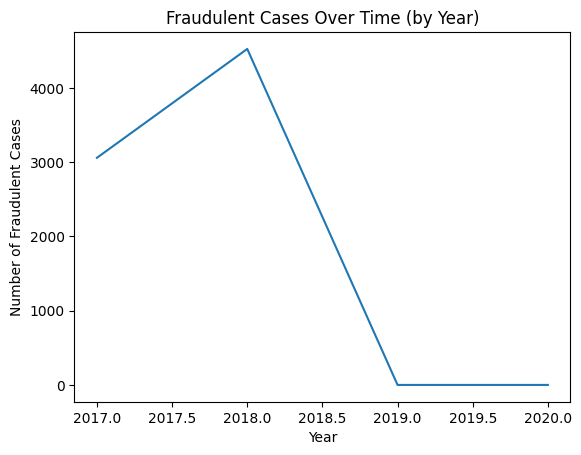

In [40]:
# Group by year and plot the number of fraudulent cases
df1.groupby(df1['timestamp'].dt.year)['FRAUD'].sum().plot(kind='line')
plt.xlabel('Year')
plt.ylabel('Number of Fraudulent Cases')
plt.title('Fraudulent Cases Over Time (by Year)')
plt.show()

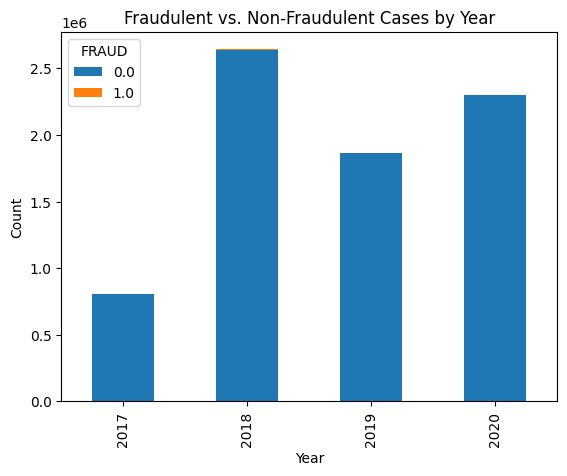

In [41]:
# Group by year and plot a bar chart of fraudulent vs. non-fraudulent cases
df.groupby([df1['timestamp'].dt.year, 'FRAUD'])['FRAUD'].count().unstack().plot(kind='bar', stacked=True)
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Fraudulent vs. Non-Fraudulent Cases by Year')
plt.show()

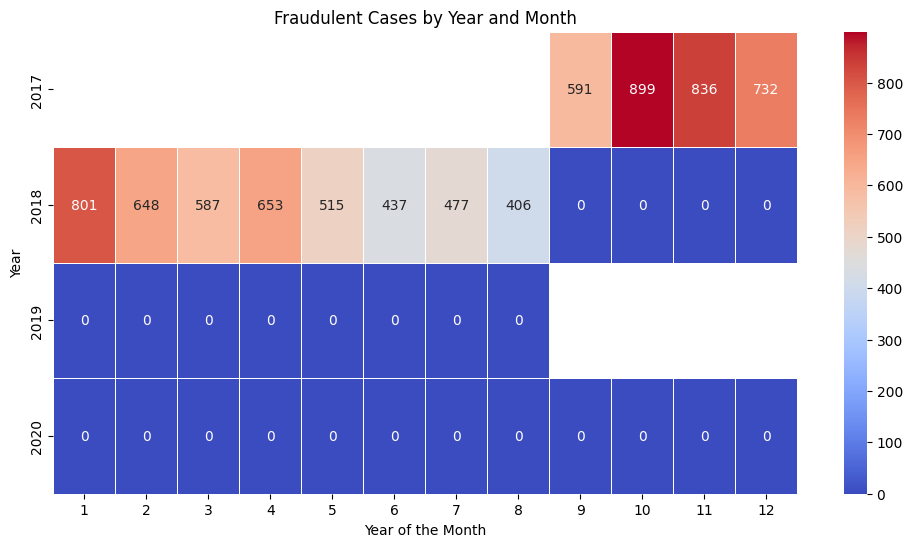

In [42]:
# Create a pivot table to prepare the data for the heatmap
pivot_table = df1.pivot_table(index='Year', columns='Month', values='FRAUD', aggfunc='sum')

# Create a heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, cmap='coolwarm', annot=True, fmt='g', linewidths=0.5)
plt.xlabel('Year of the Month')
plt.ylabel('Year')
plt.title('Fraudulent Cases by Year and Month')
plt.show()


### MONTHLY TREND

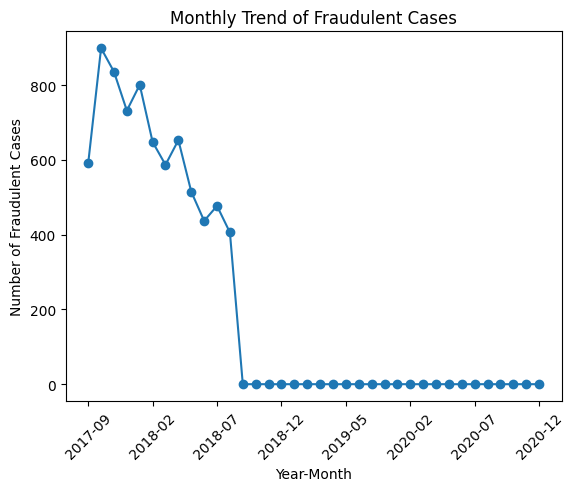

In [43]:
# Group by month and plot the number of fraudulent cases
df1.groupby(df1['timestamp'].dt.strftime('%Y-%m'))['FRAUD'].sum().plot(kind='line', marker='o')
plt.xlabel('Year-Month')
plt.ylabel('Number of Fraudulent Cases')
plt.title('Monthly Trend of Fraudulent Cases')
plt.xticks(rotation=45)
plt.show()


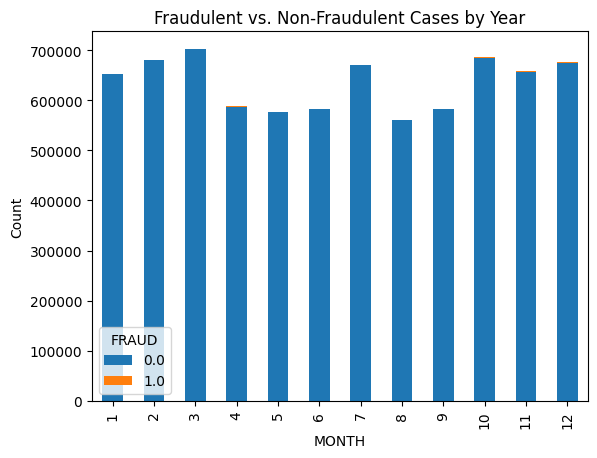

In [44]:
# Group by month and plot a bar chart of fraudulent vs. non-fraudulent cases
df.groupby([df1['timestamp'].dt.month, 'FRAUD'])['FRAUD'].count().unstack().plot(kind='bar', stacked=True)
plt.xlabel('MONTH')
plt.ylabel('Count')
plt.title('Fraudulent vs. Non-Fraudulent Cases by Year')
plt.show()



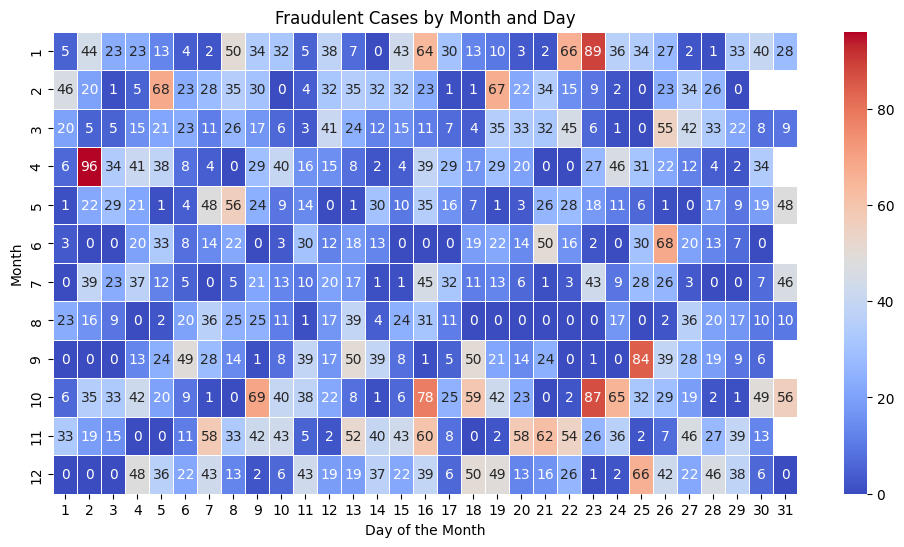

In [45]:
# Create a pivot table to prepare the data for the heatmap
pivot_table = df1.pivot_table(index='Month', columns='Day', values='FRAUD', aggfunc='sum')

# Create a heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, cmap='coolwarm', annot=True, fmt='g', linewidths=0.5)
plt.xlabel('Day of the Month')
plt.ylabel('Month')
plt.title('Fraudulent Cases by Month and Day')
plt.show()

### DAILY TREND

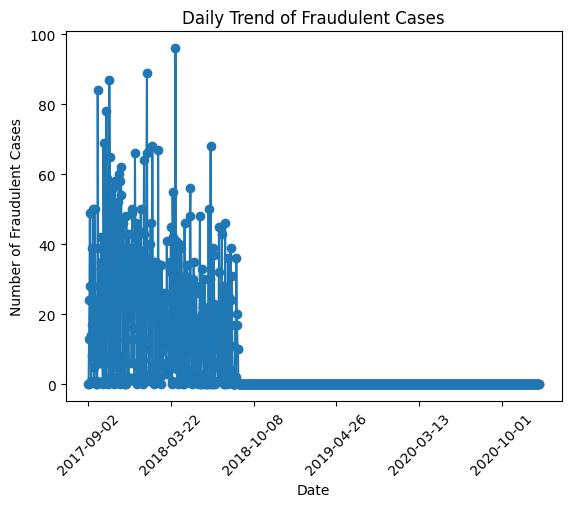

In [46]:
# Group by day and plot the number of fraudulent cases
df1.groupby(df1['timestamp'].dt.strftime('%Y-%m-%d'))['FRAUD'].sum().plot(kind='line', marker='o')
plt.xlabel('Date')
plt.ylabel('Number of Fraudulent Cases')
plt.title('Daily Trend of Fraudulent Cases')
plt.xticks(rotation=45)
plt.show()


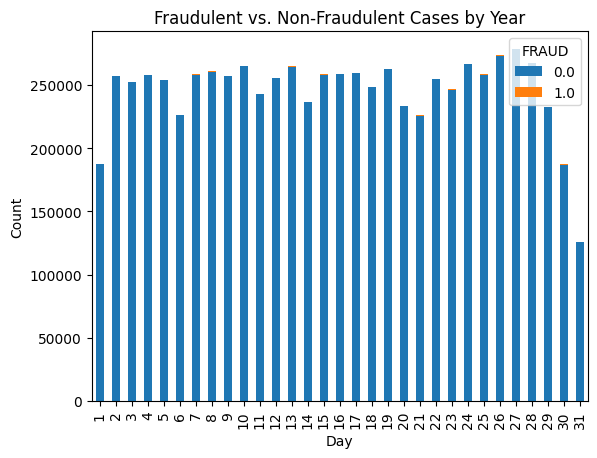

In [47]:
# Group by year and plot a bar chart of fraudulent vs. non-fraudulent cases
df.groupby([df1['timestamp'].dt.day, 'FRAUD'])['FRAUD'].count().unstack().plot(kind='bar', stacked=True)
plt.xlabel('Day')
plt.ylabel('Count')
plt.title('Fraudulent vs. Non-Fraudulent Cases by Year')
plt.show()

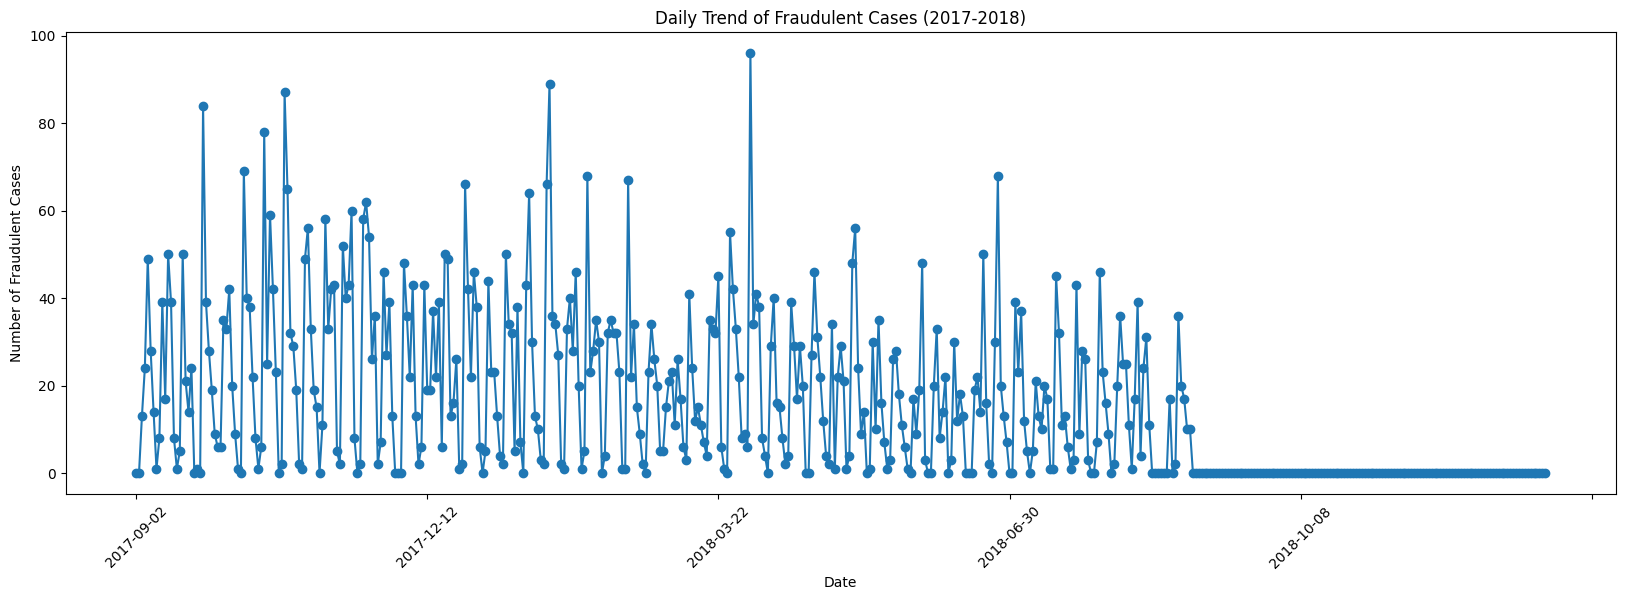

In [48]:
# Filter the data for the time range between 2017 and 2018 because of its active charts on this years
start_date = pd.to_datetime('2017-01-01')
end_date = pd.to_datetime('2018-12-31')
filtered_df = df1[(df1['timestamp'] >= start_date) & (df1['timestamp'] <= end_date)]

# Group by day and plot the number of fraudulent cases
plt.figure(figsize=(20, 6))  
filtered_df.groupby(filtered_df['timestamp'].dt.strftime('%Y-%m-%d'))['FRAUD'].sum().plot(kind='line', marker='o')
plt.xlabel('Date')
plt.ylabel('Number of Fraudulent Cases')
plt.title('Daily Trend of Fraudulent Cases (2017-2018)')
plt.xticks(rotation=45)
plt.show()

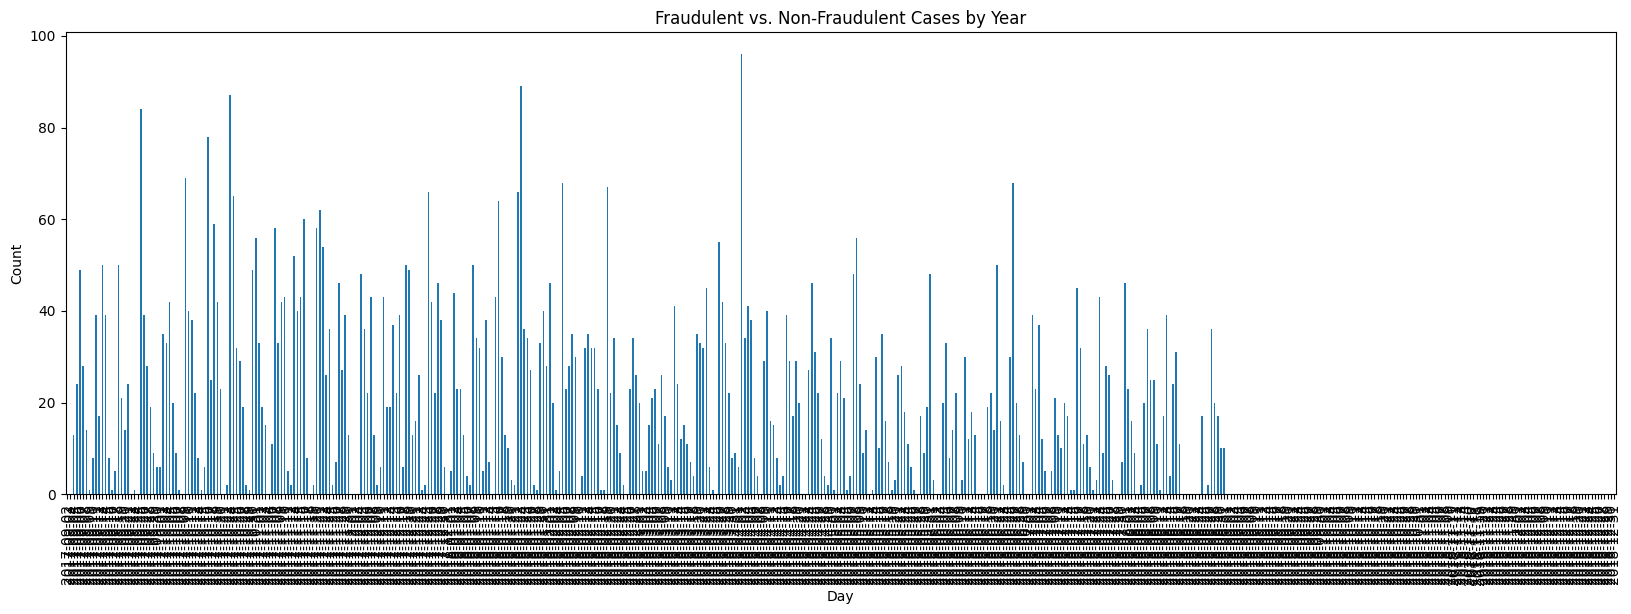

In [49]:
# Group by Day and plot a bar chart of fraudulent vs. non-fraudulent cases
plt.figure(figsize=(20, 6))  
filtered_df.groupby(filtered_df['timestamp'].dt.strftime('%Y-%m-%d'))['FRAUD'].sum().plot(kind='bar', stacked=False)
plt.xlabel('Day')
plt.ylabel('Count')
plt.title('Fraudulent vs. Non-Fraudulent Cases by Year')
plt.show()

##  SUMMARY 
as shown in the plot above we an conclude that the fraud trend was most actively on the first 2 years 2017-2018, I think we need we need to focus on the drift that happened to filter the indicators.
  * First case scenario :  there's a  a very important factor that helps the in detecting the fraudulent cases after 2018
Normaly after the pandemic, the costums activities has drop down, which is understandable during the world wide lockdown. 

# APPLYING THE AUTOENCODER ON THIS CASE 

## AUTOENCODER V01

In [50]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [51]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7616106 entries, 0 to 7616105
Data columns (total 3 columns):
 #   Column     Dtype  
---  ------     -----  
 0   timestamp  object 
 1   NGPV0      int64  
 2   FRAUD      float64
dtypes: float64(1), int64(1), object(1)
memory usage: 174.3+ MB


In [52]:
# Assuming 'FRAUD' is the target column and you want to standardize the remaining numerical columns
y_all = df2.pop('FRAUD')  # Separating the target variable

# Select only numerical columns for standardization
numerical_cols = df2.select_dtypes(include=['number'])

# Standardize the numerical columns
df2[numerical_cols.columns] = (numerical_cols - numerical_cols.mean()) / numerical_cols.std()

# Display the first few rows of the preprocessed DataFrame
print(df2.head())


             timestamp     NGPV0
0  2018/01/02 15:18:18 -2.612614
1  2018/01/02 10:03:22  0.276796
2  2018/01/03 14:06:06 -2.616238
3  2018/01/03 09:29:43  0.881931
4  2018/01/03 09:29:43  0.881931


In [53]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7616106 entries, 0 to 7616105
Data columns (total 2 columns):
 #   Column     Dtype  
---  ------     -----  
 0   timestamp  object 
 1   NGPV0      float64
dtypes: float64(1), object(1)
memory usage: 116.2+ MB


In [54]:
df2['FRAUD']=y_all

In [55]:
df2=df2.drop_duplicates()

In [56]:
del df2['timestamp']

In [57]:
#function split dataframe into multiple dataframe
target='FRAUD'
def splitDataFrameIntoSmaller(df, target):
    """
    split dataframe into smaller dataframe
    """
    l= df[target].unique()
    list_df = []
    for i in l:
        list_df.append(df[df[target]==i])
    return list_df

ldf=splitDataFrameIntoSmaller(df2,target)

In [58]:
normal_events=ldf[0] #THE NORMAL DATA SET WITH THE AC VALUES 
abnormal_events=ldf[1]#THE ABNORMAL DATASET WITH THE VP VALUES
y_abnormal=abnormal_events.pop('FRAUD')
y_normal=normal_events.pop('FRAUD')

In [59]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(normal_events,y_normal, test_size=0.2, random_state=42)

In [60]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5069975 entries, 1492643 to 2028579
Data columns (total 1 columns):
 #   Column  Dtype  
---  ------  -----  
 0   NGPV0   float64
dtypes: float64(1)
memory usage: 77.4 MB


In [61]:
X_train.shape

(5069975, 1)

In [62]:
y_train.shape

(5069975,)

In [63]:
# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [64]:

import tensorflow as tf
from sklearn.metrics import accuracy_score, precision_score, recall_score
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model

In [65]:
class AnomalyDetector(Model):
  def __init__(self):
    super(AnomalyDetector, self).__init__()
    self.encoder = tf.keras.Sequential([
      layers.Dense(16, activation="relu"),
      layers.Dense(8, activation="relu"),
      layers.Dense(4, activation="relu")])

    self.decoder=tf.keras.Sequential([
      layers.Dense(8,activation='tanh'),
      layers.Dense(16,activation='tanh'),
      layers.Dense(4, activation="sigmoid")
    ])
  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = AnomalyDetector()

autoencoder.compile(optimizer='adam', loss='mse')

In [66]:
history = autoencoder.fit(X_train, X_train, 
          epochs=15, 
          batch_size=2048,
          validation_data=(X_test, X_test),
          shuffle=True)

Epoch 1/15
2476/2476 [==============================] - 12s 4ms/step - loss: 0.6222 - val_loss: 0.6020
Epoch 2/15
2476/2476 [==============================] - 10s 4ms/step - loss: 0.6009 - val_loss: 0.6016
Epoch 3/15
2476/2476 [==============================] - 10s 4ms/step - loss: 0.6007 - val_loss: 0.6015
Epoch 4/15
2476/2476 [==============================] - 10s 4ms/step - loss: 0.6006 - val_loss: 0.6015
Epoch 5/15
2476/2476 [==============================] - 10s 4ms/step - loss: 0.6006 - val_loss: 0.6015
Epoch 6/15
2476/2476 [==============================] - 10s 4ms/step - loss: 0.6006 - val_loss: 0.6015
Epoch 7/15
2476/2476 [==============================] - 10s 4ms/step - loss: 0.6006 - val_loss: 0.6015
Epoch 8/15
2476/2476 [==============================] - 10s 4ms/step - loss: 0.6006 - val_loss: 0.6015
Epoch 9/15
2476/2476 [==============================] - 10s 4ms/step - loss: 0.6006 - val_loss: 0.6015
Epoch 10/15
2476/2476 [==============================] - 10s 4ms/step - l

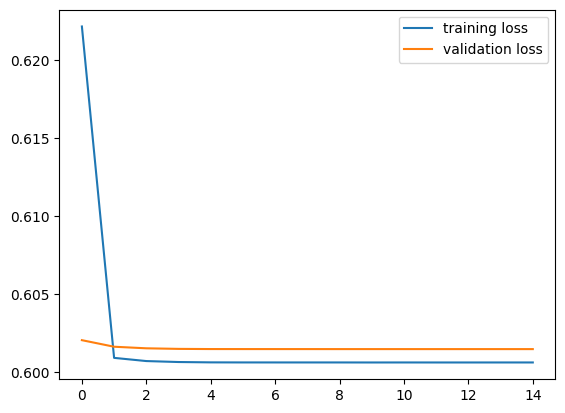

In [67]:
plt.plot(history.history['loss'],label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.legend()

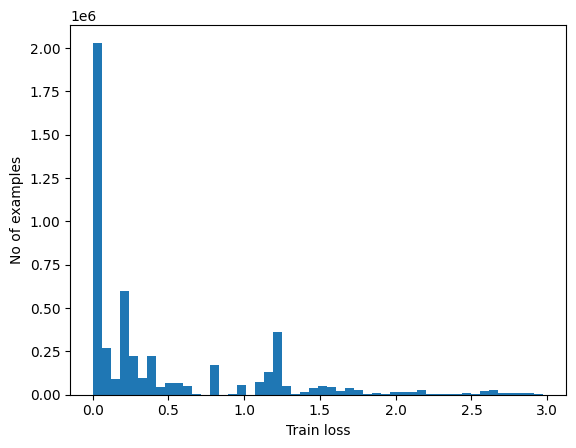

In [68]:
reconstructions = autoencoder.predict(X_train)
train_loss = tf.keras.losses.mae(reconstructions, X_train)

plt.hist(train_loss[None,:], bins=50)
plt.xlabel("Train loss")
plt.ylabel("No of examples")
plt.show()

In [69]:
threshold = np.mean(train_loss) + np.std(train_loss)
print("Threshold: ", threshold)

Threshold:  1.0816879245154025


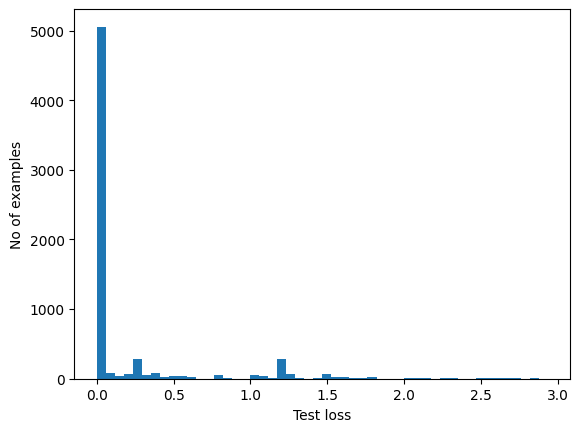

In [70]:
reconstructions = autoencoder.predict(abnormal_events)
test_loss = tf.keras.losses.mae(reconstructions, abnormal_events)

plt.hist(test_loss[None, :], bins=50)
plt.xlabel("Test loss")
plt.ylabel("No of examples")
plt.show()

In [71]:
def predict(model, data, threshold):
  reconstructions = model(data)
  loss = tf.keras.losses.mae(reconstructions, data)
  return tf.math.less(loss, threshold)

def print_stats(predictions, labels):
  print("Accuracy = {}".format(accuracy_score(labels, predictions)))
  print("Precision = {}".format(precision_score(labels, predictions)))
  print("Recall = {}".format(recall_score(labels, predictions)))

In [72]:
y_all=df2.pop('FRAUD')

In [73]:
data=tf.convert_to_tensor(df2) 

In [74]:
preds = predict(autoencoder, data, threshold)
print_stats(preds, y_all)

Accuracy = 0.2124321255271069
Precision = 0.0011822188526419083
Recall = 0.8965883244882487


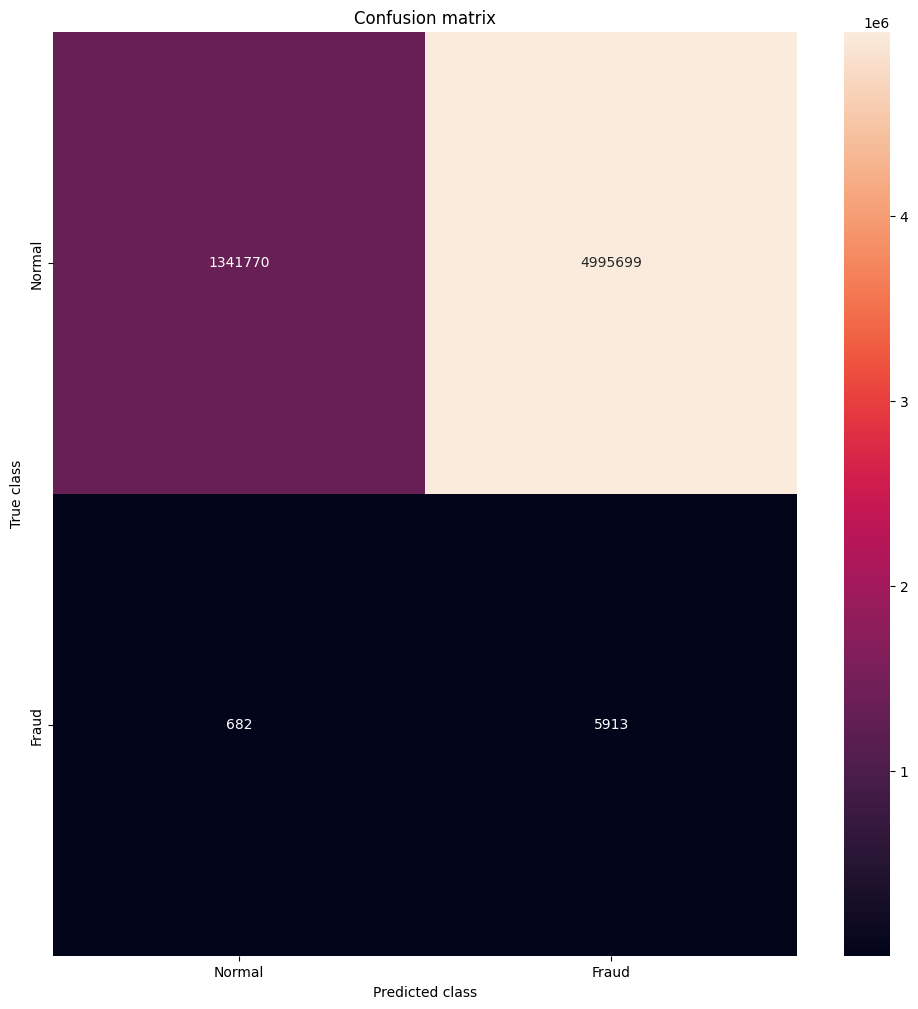

In [75]:
LABELS=['Normal','Fraud']
confusion_matrix = pd.crosstab(y_all, preds)
plt.figure(figsize=(12, 12))
sns.heatmap(confusion_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d")
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

## AUTOENCODER V02

In [33]:
#creating a dataset for the purpose to study the influence of the value fraudulent cases on the 
#data=pd.DataFrame(df,columns=['IDENTIFIANT_DUM','ID_OPERATEUR','DECLARANT_POUR_LUI_MEME','ID_TRANSITAIRE','DATEENREGISTREMENT','VALEURV0','NGPV0','FRAUD'])
data1.info()
data=data1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7616106 entries, 0 to 7616105
Data columns (total 8 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   IDENTIFIANT_DUM          int64  
 1   ID_OPERATEUR             int64  
 2   DECLARANT_POUR_LUI_MEME  object 
 3   ID_TRANSITAIRE           int64  
 4   DATEENREGISTREMENT       object 
 5   VALEURV0                 float64
 6   NGPV0                    int64  
 7   FRAUD                    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 464.9+ MB


In [34]:
data.head()

,IDENTIFIANT_DUM,ID_OPERATEUR,DECLARANT_POUR_LUI_MEME,ID_TRANSITAIRE,DATEENREGISTREMENT,VALEURV0,NGPV0,FRAUD
0,20887414,75598,N,11458,2018/01/02 15:18:18,519821.0,910110019,0.0
1,20889968,283487,N,284408,2018/01/02 10:03:22,856760.0,7216210000,0.0
2,20890926,15526,N,11555,2018/01/03 14:06:06,2276321.0,902200000,0.0
3,20891204,10509,N,11545,2018/01/03 09:29:43,16015.0,8536909011,0.0
4,20891204,10509,N,11545,2018/01/03 09:29:43,1860.0,8536909015,0.0


In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [36]:
data=data.drop_duplicates()

In [37]:
data=risk_op(data)

C:\Users\Storbiiic\AppData\Local\Temp\ipykernel_11520\213269792.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['RISK_OP'] = data['ID_OPERATEUR'].isin(Fraud_op['ID_OPERATEUR'].unique()).astype(int)


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7115518 entries, 0 to 7616105
Data columns (total 9 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   IDENTIFIANT_DUM          int64  
 1   ID_OPERATEUR             int64  
 2   DECLARANT_POUR_LUI_MEME  object 
 3   ID_TRANSITAIRE           int64  
 4   DATEENREGISTREMENT       object 
 5   VALEURV0                 float64
 6   NGPV0                    int64  
 7   FRAUD                    float64
 8   RISK_OP                  int32  
dtypes: float64(2), int32(1), int64(4), object(2)
memory usage: 515.7+ MB


In [39]:
data['RISK_OP'].value_counts()

RISK_OP
0    6944185
1     171333
Name: count, dtype: int64

In [40]:
data=risk_tr(data)

C:\Users\Storbiiic\AppData\Local\Temp\ipykernel_11520\1411234743.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['RISK_tr'] = data['ID_TRANSITAIRE'].isin(Fraud_tr['ID_TRANSITAIRE'].unique()).astype(int)


In [41]:
data.head()

,IDENTIFIANT_DUM,ID_OPERATEUR,DECLARANT_POUR_LUI_MEME,ID_TRANSITAIRE,DATEENREGISTREMENT,VALEURV0,NGPV0,FRAUD,RISK_OP,RISK_tr
0,20887414,75598,N,11458,2018/01/02 15:18:18,519821.0,910110019,0.0,0,1
1,20889968,283487,N,284408,2018/01/02 10:03:22,856760.0,7216210000,0.0,0,1
2,20890926,15526,N,11555,2018/01/03 14:06:06,2276321.0,902200000,0.0,0,1
3,20891204,10509,N,11545,2018/01/03 09:29:43,16015.0,8536909011,0.0,0,1
4,20891204,10509,N,11545,2018/01/03 09:29:43,1860.0,8536909015,0.0,0,1


In [42]:
data['RISK_tr'].value_counts()

RISK_tr
1    5930594
0    1184924
Name: count, dtype: int64

In [44]:
data=to_date(data)

In [45]:
data.head()

,IDENTIFIANT_DUM,ID_OPERATEUR,DECLARANT_POUR_LUI_MEME,ID_TRANSITAIRE,VALEURV0,NGPV0,FRAUD,RISK_OP,RISK_tr,Year,Month,Day
0,20887414,75598,N,11458,519821.0,910110019,0.0,0,1,2018,1,2
1,20889968,283487,N,284408,856760.0,7216210000,0.0,0,1,2018,1,2
2,20890926,15526,N,11555,2276321.0,902200000,0.0,0,1,2018,1,3
3,20891204,10509,N,11545,16015.0,8536909011,0.0,0,1,2018,1,3
4,20891204,10509,N,11545,1860.0,8536909015,0.0,0,1,2018,1,3


In [48]:
# Select only some columns for standardization
numerical_cols = ['IDENTIFIANT_DUM','ID_OPERATEUR','ID_OPERATEUR','ID_TRANSITAIRE','VALEURV0']

# Standardize the numerical columns
data[numerical_cols] = (numerical_cols - numerical_cols.mean()) / numerical_cols.std()

# Display the first few rows of the preprocessed DataFrame
data.head()

KeyError: 'FRAUD'

In [87]:
from sklearn.preprocessing import LabelEncoder
# Initialize the LabelEncoder
label_encoder = LabelEncoder()
# Fit and transform the categorical column
data['DECLARANT_POUR_LUI_MEME']= label_encoder.fit_transform(data['DECLARANT_POUR_LUI_MEME'])

In [88]:
print(data)

         IDENTIFIANT_DUM  ID_OPERATEUR  DECLARANT_POUR_LUI_MEME  \
0              -1.295828     -0.244674                        0   
1              -1.294708      1.310677                        0   
2              -1.294289     -0.694111                        0   
3              -1.294167     -0.731647                        0   
4              -1.294167     -0.731647                        0   
...                  ...           ...                      ...   
7616101         1.710370      1.498549                        0   
7616102         1.572261     -0.615524                        0   
7616103         1.572261     -0.615524                        0   
7616104         1.669142     -0.181851                        0   
7616105         1.572364     -0.615524                        0   

         ID_TRANSITAIRE  VALEURV0     NGPV0   RISK_OP   RISK_tr  Year  Month  \
0             -0.521965  0.076848 -2.617267 -0.157076 -0.241398   NaN    NaN   
1              1.866940  0.147260  

In [89]:
data['FRAUD']=y_all

In [90]:
#function split dataframe into multiple dataframe
target='FRAUD'
def splitDataFrameIntoSmaller(df, target):
    """
    split dataframe into smaller dataframe
    """
    l= df[target].unique()
    list_df = []
    for i in l:
        list_df.append(df[df[target]==i])
    return list_df

ldf=splitDataFrameIntoSmaller(data,target)

In [91]:
normal_events=ldf[0] #THE NORMAL DATA SET WITH THE AC VALUES 
abnormal_events=ldf[1]#THE ABNORMAL DATASET WITH THE VP VALUES
y_abnormal=abnormal_events.pop('FRAUD')
y_normal=normal_events.pop('FRAUD')

In [92]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(normal_events,y_normal, test_size=0.2, random_state=42)

In [93]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5687085 entries, 3059460 to 6861756
Data columns (total 11 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   IDENTIFIANT_DUM          float64
 1   ID_OPERATEUR             float64
 2   DECLARANT_POUR_LUI_MEME  int32  
 3   ID_TRANSITAIRE           float64
 4   VALEURV0                 float64
 5   NGPV0                    float64
 6   RISK_OP                  float64
 7   RISK_tr                  float64
 8   Year                     float64
 9   Month                    float64
 10  Day                      float64
dtypes: float64(10), int32(1)
memory usage: 499.0 MB


In [94]:
X_train.shape

(5687085, 11)

In [95]:
y_train.shape

(5687085,)

In [96]:
# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

c:\Users\Storbiiic\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\utils\extmath.py:1051: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
c:\Users\Storbiiic\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\utils\extmath.py:1056: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
c:\Users\Storbiiic\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\utils\extmath.py:1076: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [97]:

import tensorflow as tf
from sklearn.metrics import accuracy_score, precision_score, recall_score
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model

In [98]:
class AnomalyDetector(Model):
  def __init__(self):
    super(AnomalyDetector, self).__init__()
    self.encoder = tf.keras.Sequential([
      layers.Dense(16, activation="relu"),
      layers.Dense(8, activation="relu"),
      layers.Dense(11, activation="relu")])

    self.decoder=tf.keras.Sequential([
      layers.Dense(8,activation='tanh'),
      layers.Dense(16,activation='tanh'),
      layers.Dense(11, activation="sigmoid")
    ])
  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = AnomalyDetector()

autoencoder.compile(optimizer='adam', loss='mse')

In [99]:
history = autoencoder.fit(X_train, X_train, 
          epochs=5, 
          batch_size=2048,
          validation_data=(X_test, X_test),
          shuffle=True)

Epoch 1/5
2777/2777 [==============================] - 9s 3ms/step - loss: nan - val_loss: nan
Epoch 2/5
2777/2777 [==============================] - 8s 3ms/step - loss: nan - val_loss: nan
Epoch 3/5
2777/2777 [==============================] - 8s 3ms/step - loss: nan - val_loss: nan
Epoch 4/5
2777/2777 [==============================] - 8s 3ms/step - loss: nan - val_loss: nan
Epoch 5/5
2777/2777 [==============================] - 8s 3ms/step - loss: nan - val_loss: nan


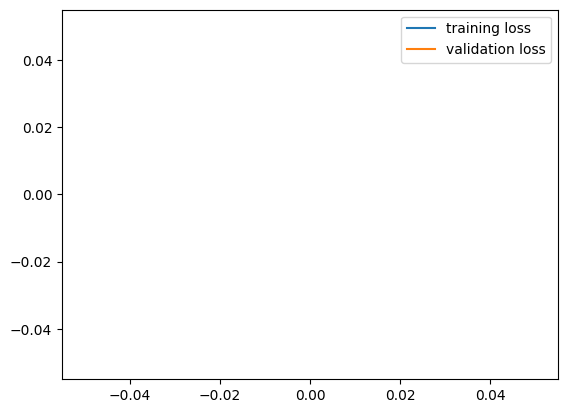

In [100]:
plt.plot(history.history['loss'],label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.legend()

In [101]:
reconstructions = autoencoder.predict(X_train)
train_loss = tf.keras.losses.mae(reconstructions, X_train)

plt.hist(train_loss[None,:], bins=50)
plt.xlabel("Train loss")
plt.ylabel("No of examples")
plt.show()

ResourceExhaustedError: failed to allocate memory [Op:Sub]

In [ ]:
threshold = np.mean(train_loss) + np.std(train_loss)
print("Threshold: ", threshold)

Threshold:  0.7571528515874706


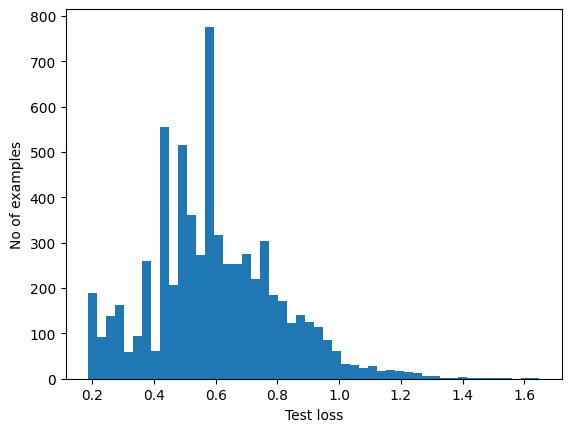

In [ ]:
reconstructions = autoencoder.predict(abnormal_events)
test_loss = tf.keras.losses.mae(reconstructions, abnormal_events)

plt.hist(test_loss[None, :], bins=50)
plt.xlabel("Test loss")
plt.ylabel("No of examples")
plt.show()

In [ ]:
def predict(model, data, threshold):
  reconstructions = model(data)
  loss = tf.keras.losses.mae(reconstructions, data)
  return tf.math.less(loss, threshold)

def print_stats(predictions, labels):
  print("Accuracy = {}".format(accuracy_score(labels, predictions)))
  print("Precision = {}".format(precision_score(labels, predictions)))
  print("Recall = {}".format(recall_score(labels, predictions)))

In [ ]:
y_all=df2.pop('FRAUD')

In [ ]:
data=tf.convert_to_tensor(df2) 

In [ ]:
preds = predict(autoencoder, data, threshold)
print_stats(preds, y_all)

Accuracy = 0.16283410760042774
Precision = 0.0009757637665760834
Recall = 0.7863532979529947


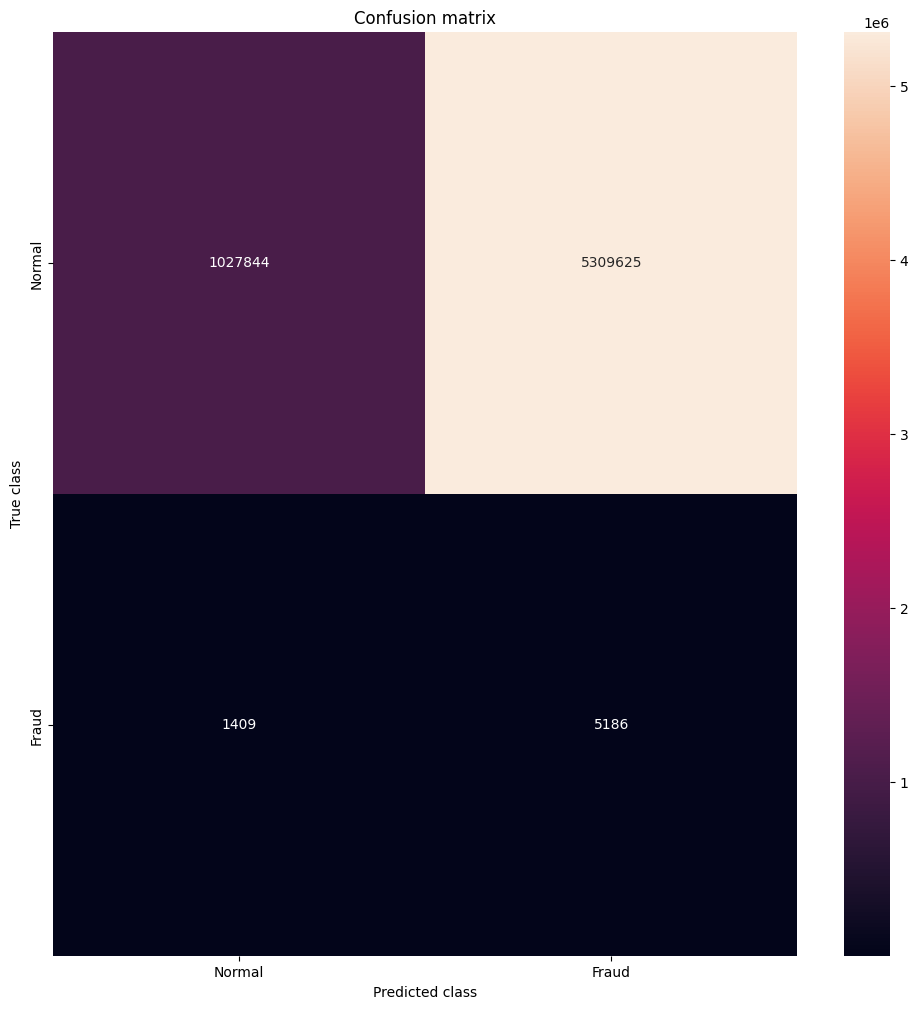

In [ ]:
LABELS=['Normal','Fraud']
confusion_matrix = pd.crosstab(y_all, preds)
plt.figure(figsize=(12, 12))
sns.heatmap(confusion_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d")
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()